# Kmeans

In [1]:
#ignore sklearn warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython import display

In [3]:
import sklearn
sklearn.__version__

'1.4.2'

In [4]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, ax):
    color=np.array(['red', 'purple', 'orange'])
    labels = kmeans.predict(X)
    # plot the input data
    ax.axis('equal')
    if labels.max() <=3:
        ax.scatter(X[:, 0], X[:, 1], c=color[labels], s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

### Generate some data points

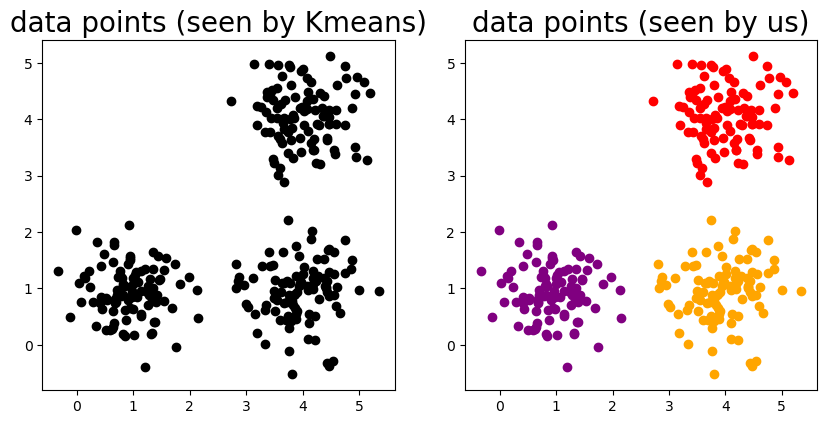

In [5]:
#%% create a random number generator
rng = np.random.RandomState(0)
#%% generate some data samples (three groups) in 2D space
#group1: M data samples
M=100
sigma=0.5 # try 0.5, 1, and 2(overlapping clusters)
X1 = sigma*rng.randn(M,2)
X1 += [4, 4] #center of group1
#group2: M data samples
X2 = sigma*rng.randn(M,2)
X2 += [1, 1] #center of group2
#group3: M data samples
X3 = sigma*rng.randn(M,2)
X3 += [4, 1] #center of group3
#put data in one 2D array
X = np.concatenate([X1, X2, X3], axis=0)
#
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].plot(X1[:,0], X1[:,1], 'ko')
ax[0].plot(X2[:,0], X2[:,1], 'ko')
ax[0].plot(X3[:,0], X3[:,1], 'ko')
ax[0].set_aspect('equal')
ax[0].set_title('data points (seen by Kmeans)', fontsize=20)
ax[1].plot(X1[:,0], X1[:,1], 'o', color='red')
ax[1].plot(X2[:,0], X2[:,1], 'o', color='purple')
ax[1].plot(X3[:,0], X3[:,1], 'o', color='orange')
ax[1].set_aspect('equal')
ax[1].set_title('data points (seen by us)', fontsize=20)
plt.draw()

### Step-1:  set the number of clusters and  initialize the parameters

Text(0.5, 1.0, 'Initialization')

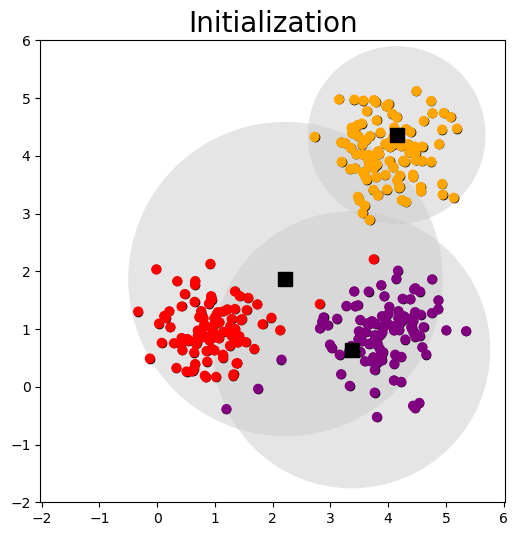

In [6]:
from sklearn.mixture import GaussianMixture
#-----------------------------
#random initializtion
means_init = 6*rng.rand(3,2)
#a better method
#means_init='k-means++'
model=KMeans(n_clusters=3, max_iter=1, n_init=1, init=means_init)
model.fit(X)
means_=model.cluster_centers_
#----------------------------------------------
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(X[:,0], X[:,1], 'ko')
plot_kmeans(model, X, ax)
s=['ks', 'ks', 'ks']
for k in range(0, 3):
    ax.plot(means_[k,0], means_[k,1], s[k], markersize=10)
ax.axis([-2, 6, -2, 6])
ax.set_aspect('equal')
ax.set_title('Initialization', fontsize=20)

### Update the parameters and cluster labels in a loop

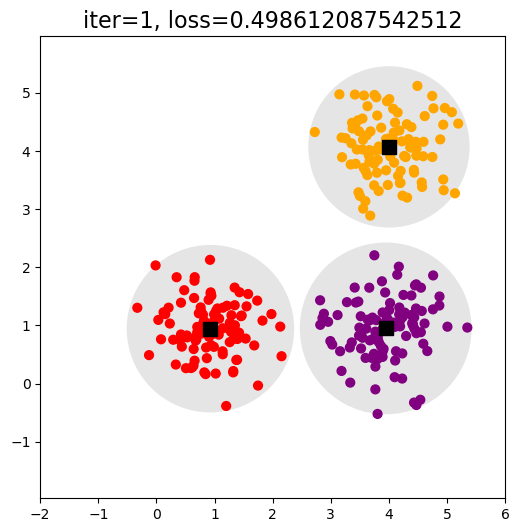

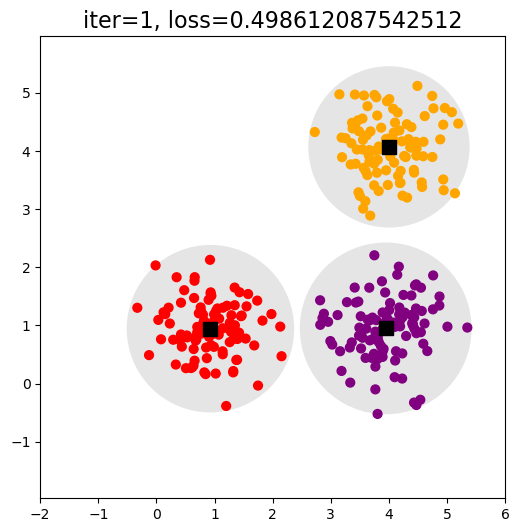

change in loss < 1e-16, break
Elapsed time is 4.850559 seconds 



In [7]:
loss_list=[]
tic = time.time() # time recorder
for n in range(0, 20):
    model_n=KMeans(n_clusters=3, max_iter=1, n_init=1,init=model.cluster_centers_)    
    model_n.fit(X)
    label=model_n.predict(X)
    loss=model_n.inertia_/X.shape[0]
    model=model_n
    loss_list.append(loss)
    if len(loss_list) > 1:
        if abs(loss_list[-1]-loss_list[-2])<1e-16:
            print('change in loss < 1e-16, break')
            break    
    display.clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(6,6))    
    plot_kmeans(model_n, X, ax)
    s=['ks', 'ks', 'ks']
    for k in range(0, 3):
        ax.plot(model_n.cluster_centers_[k,0], model_n.cluster_centers_[k,1], s[k], markersize=10)
    ax.set_title('iter='+str(n)+', loss='+str(loss), fontsize=16)
    ax.axis([-2, 6, -2, 6])
    ax.set_aspect('equal')
    plt.draw()    
    display.display(fig)
    plt.pause(2)
    plt.close(fig)
toc = time.time()
print('Elapsed time is %f seconds \n' % float(toc - tic))

### plot the loss values over many iterations

Text(0, 0.5, 'Loss')

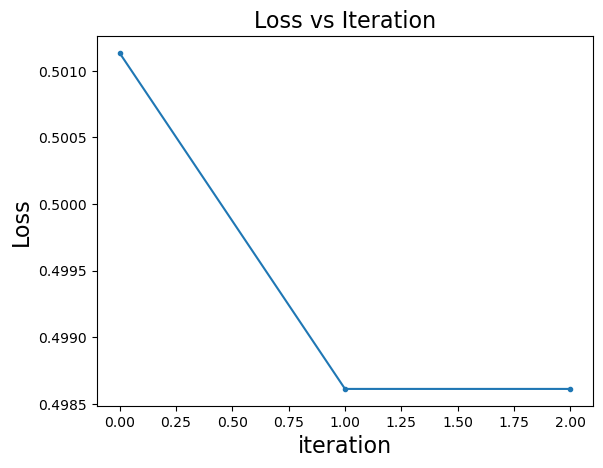

In [8]:
fig, ax = plt.subplots()
ax.plot(loss_list, '.-')
ax.set_title('Loss vs Iteration', fontsize=16)
ax.set_xlabel('iteration', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)

Text(0.5, 1.0, 'two half circles')

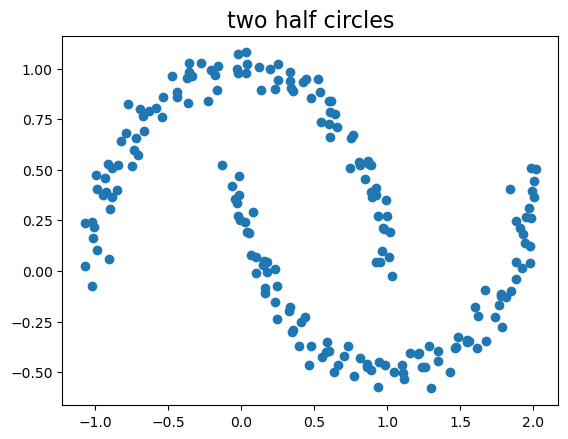

In [9]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);
plt.title('two half circles', fontsize=16)

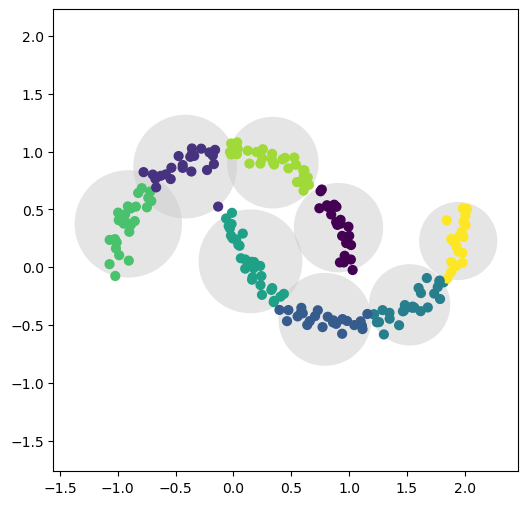

In [10]:
model8=KMeans(n_clusters=8)    
model8.fit(Xmoon)
fig, ax = plt.subplots(figsize=(6,6))    
plot_kmeans(model8, Xmoon, ax)

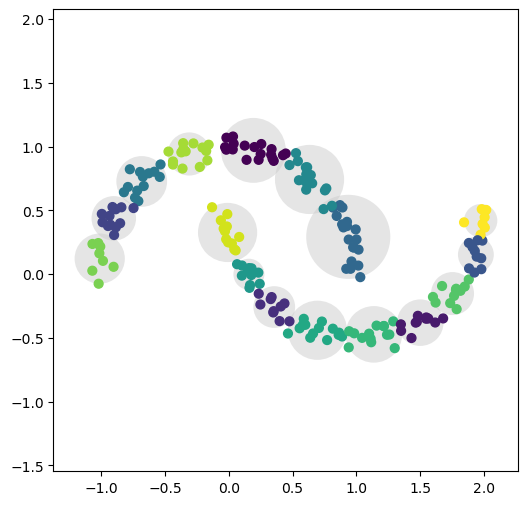

In [11]:
model16=KMeans(n_clusters=16)    
model16.fit(Xmoon)
fig, ax = plt.subplots(figsize=(6,6))    
plot_kmeans(model16, Xmoon, ax)